In [38]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt



In [59]:
def extract_row(file_path, name):
# Input: file_path string and key string (to search in first col)
# Output: np.array of values 
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row and name in row[0]:
                return np.array([float(value) for value in row[1:]])
    return np.array([])

In [60]:
extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/treatment1_13Aug.csv", "Aadya-totalProcessingDelay" )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/treatment1_13Aug.csv'

In [ ]:

def plot_array(values, title="Plot", xlabel="Time [s]", ylabel="Value"):
    """
    Plots a NumPy array.

    Parameters:
        values (np.array): The array to be plotted.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(0, len(values)), values, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [93]:
import matplotlib.pyplot as plt

def plot_multiple_arrays(arrays, labels=None, title="Plot", xlabel="Time [s]", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    
    for i, values in enumerate(arrays):
        # Generate x values according to the length of each array
        x_values = np.arange(0, len(values))
        # Plot each array
        plt.plot(x_values, values, marker=' ', label=labels[i] if labels else f"Series {i+1}")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
file_path1 = '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/13_Aug/treatment1_13Aug.csv'
file_path2= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/13_Aug/treatment2_13Aug.csv'
file_path3= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/13_Aug/treatment3_13Aug.csv'
file_path4= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/13_Aug/treatment4_13Aug.csv'
file_path5= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/13_Aug/treatment5_13Aug_aadya_only.csv'

def get_values(key):
    values1 = extract_row(file_path1, key)
    values2 = extract_row(file_path2, key)
    values3 = extract_row(file_path3, key)
    values4 = extract_row(file_path4, key)
    values5 = extract_row(file_path5, key)
    return [values1,values2, values3, values4, values5 ]

def get_values_ellen(key):
    values1 = extract_row(file_path1, key)
    values2 = extract_row(file_path2, key)
    values3 = extract_row(file_path3, key)
    values4 = extract_row(file_path4, key)
    #values5 = extract_row(file_path5, key)
    return [values1,values2, values3, values4]

In [ ]:
filepath_1 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment1.csv"
filepath_2 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment2.csv"
filepath_3 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment3.csv"

In [ ]:
def get_new_values(key):
    values1 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment1.csv", key)
    values2 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment2.csv", key)
    values3= extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/27_Aug/treatment3.csv", key)
    return [values1,values2, values3]

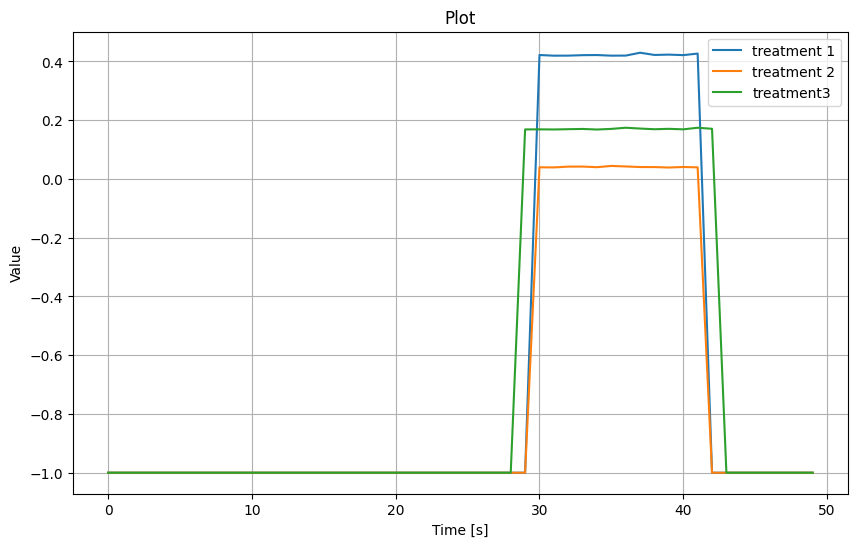

In [ ]:
plot_multiple_arrays(get_new_values('Ellen-roundTripTime'), labels=["treatment 1", "treatment 2", "treatment3"])

Plot a stat over time for multiple calls at once

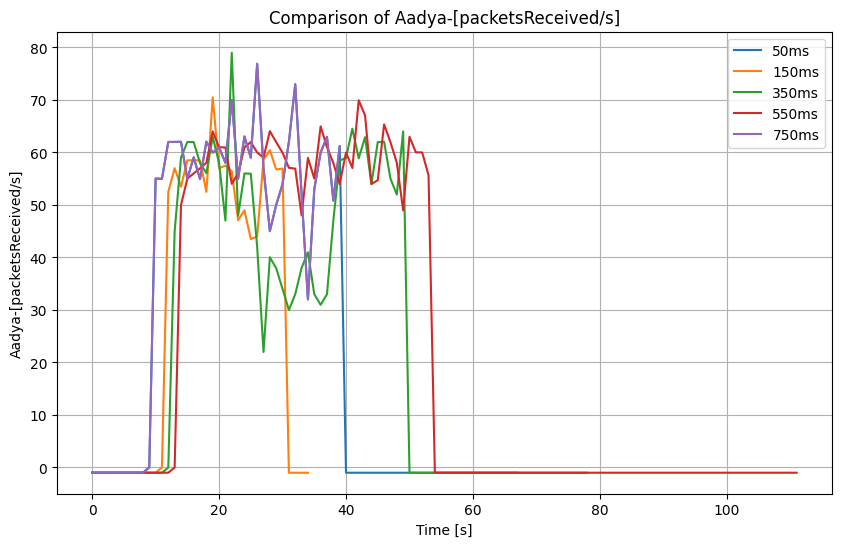

In [ ]:
key = 'Aadya-[packetsReceived/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms" ,"750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

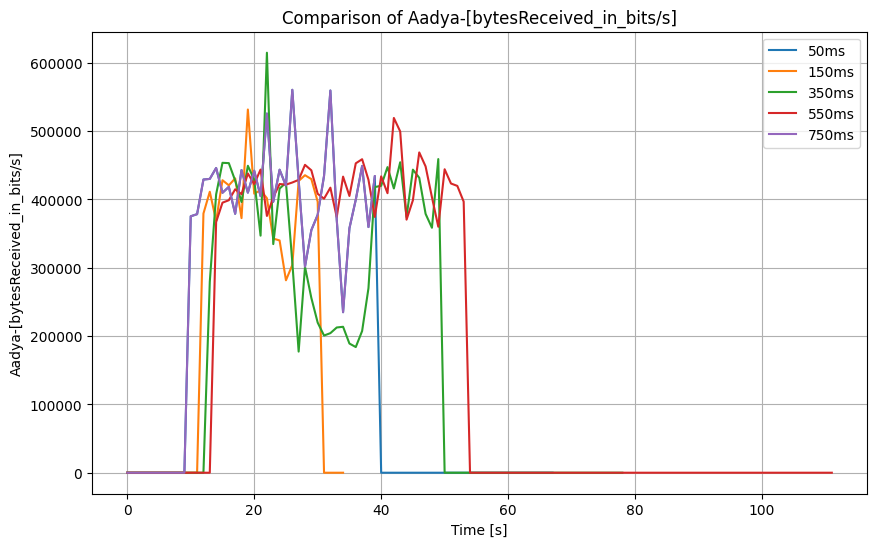

In [ ]:
key = 'Aadya-[bytesReceived_in_bits/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

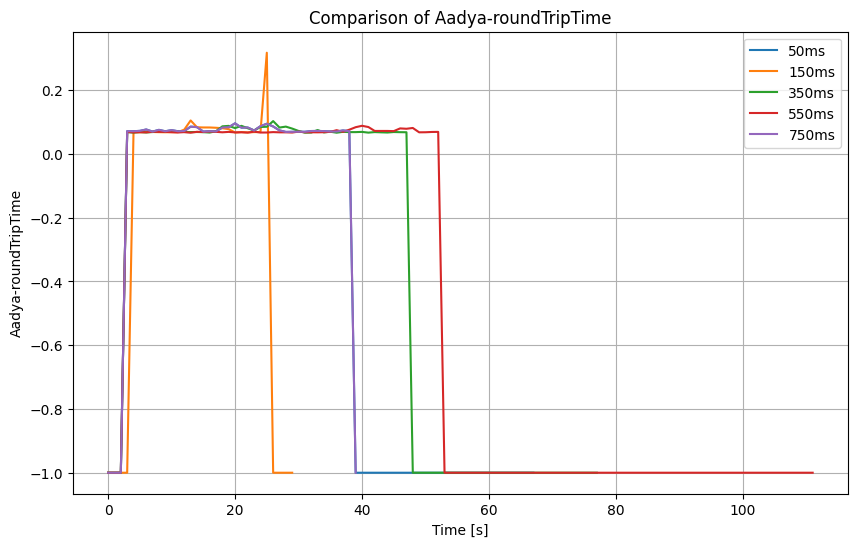

In [ ]:
key = 'Aadya-roundTripTime' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

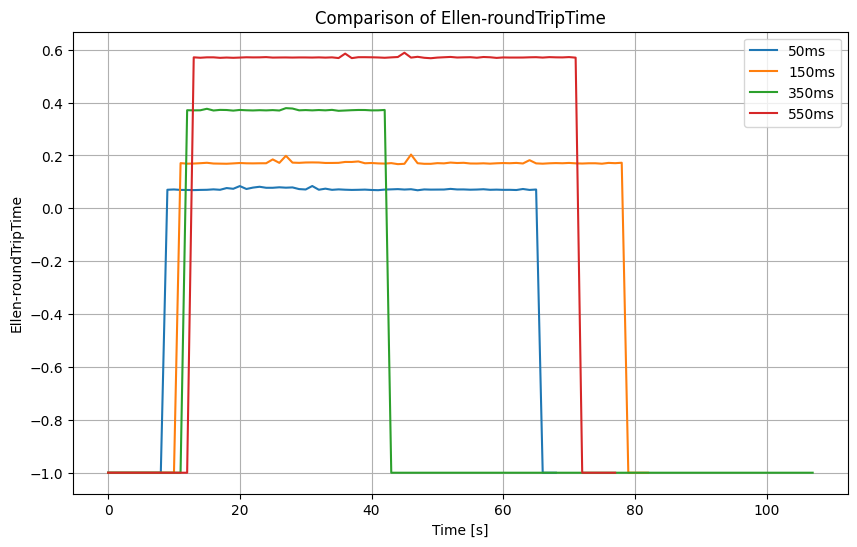

In [ ]:
key = 'Ellen-roundTripTime' #stat to compare across latencies
plot_multiple_arrays(get_values_ellen(key), labels=["50ms", "150ms", "350ms", "550ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

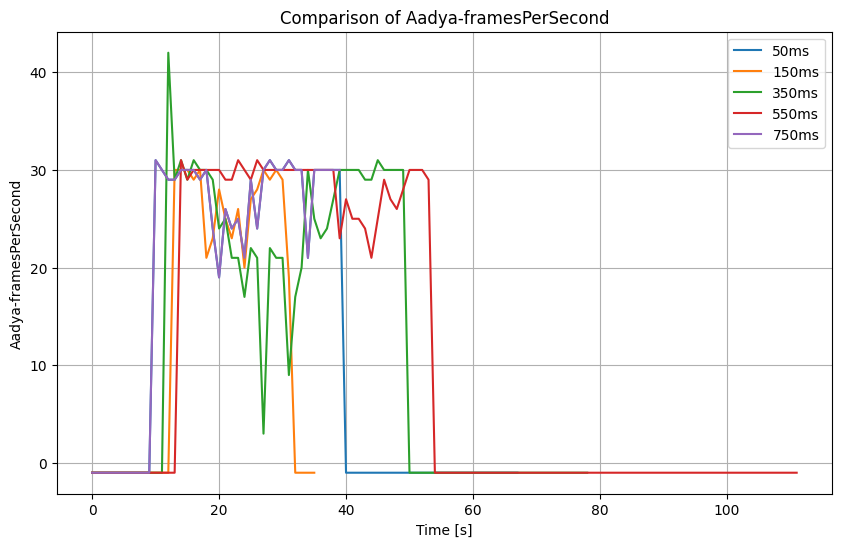

In [ ]:
key = 'Aadya-framesPerSecond' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

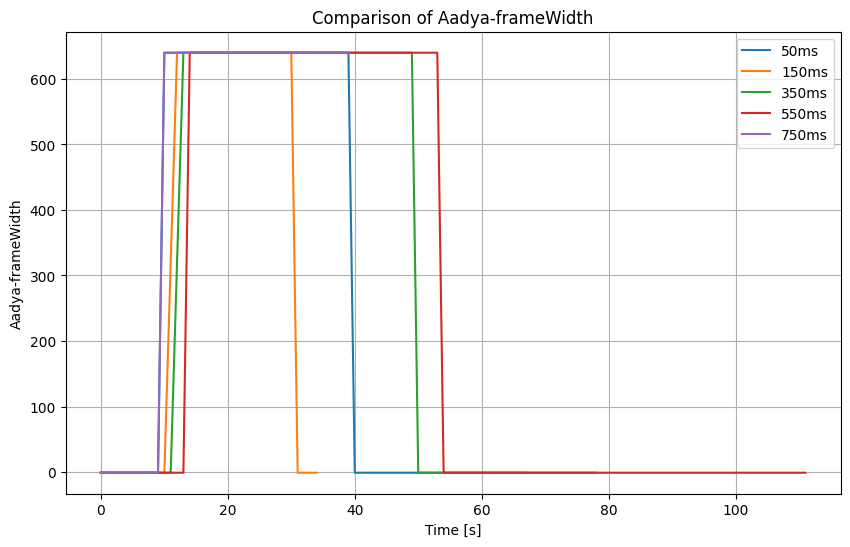

In [ ]:
key = 'Aadya-frameWidth' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

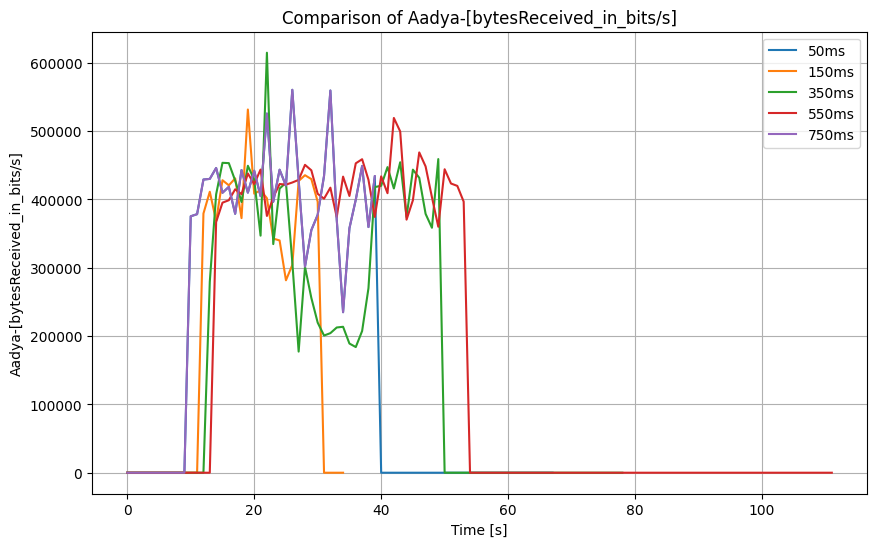

In [ ]:
key = 'Aadya-[bytesReceived_in_bits/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

In [ ]:
def get_values_diff_keys(key1, key2, file_path):
    values1 = extract_row(file_path, key1)
    values2 = extract_row(file_path, key2)
    return [values1,values2]

def get_values_3_keys(key1, key2, key3, file_path):
    values1 = extract_row(file_path, key1)
    values2 = extract_row(file_path, key2)
    values3 = extract_row(file_path, key3)
    return [values1,values2, values3]

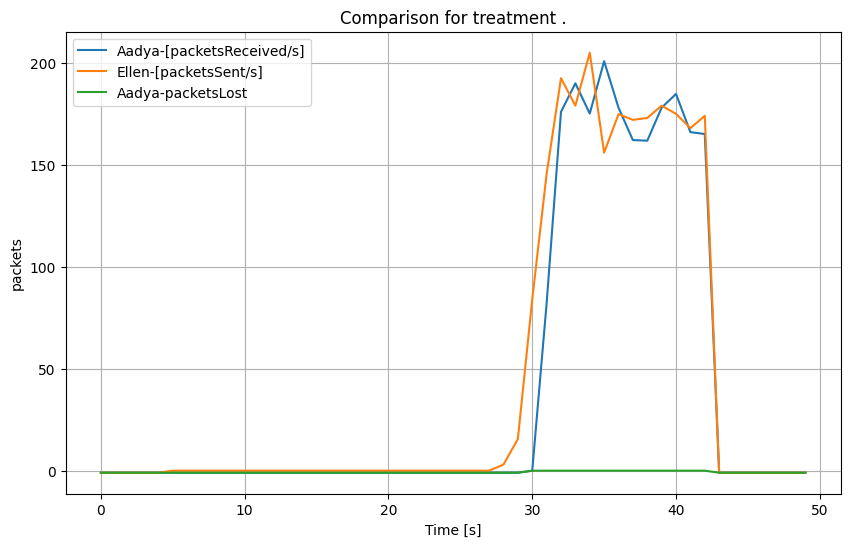

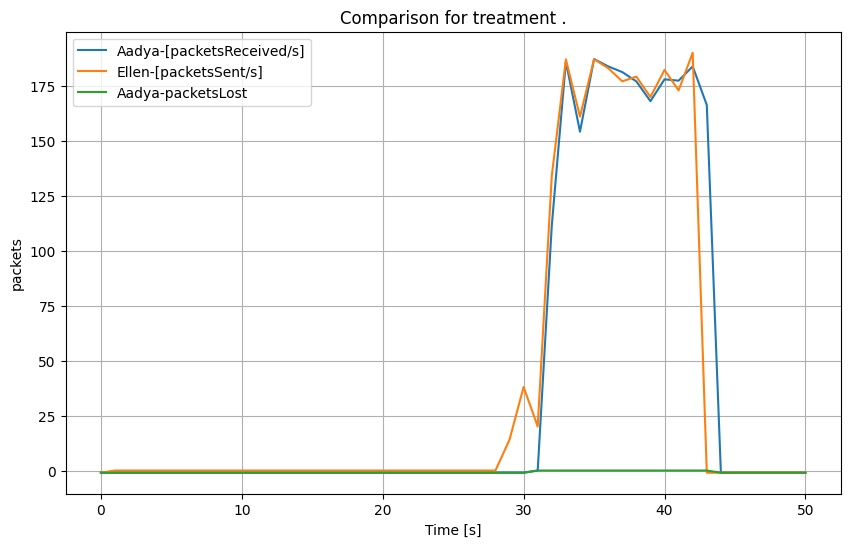

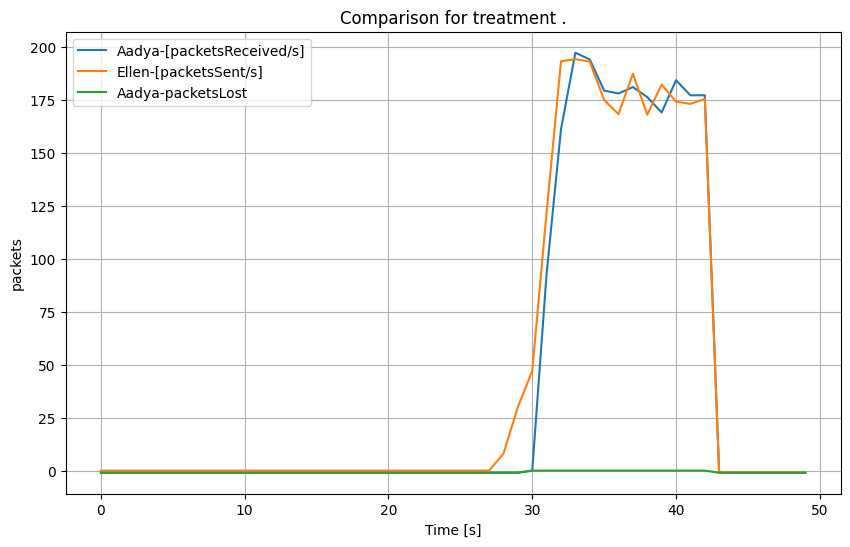

In [ ]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
key3 = 'Aadya-packetsLost'
file_paths = [filepath_1, filepath_2, filepath_3]
for filepath in file_paths:
    plot_multiple_arrays(get_values_3_keys(key1, key2, key3, filepath), labels=[key1, key2, key3], title=str("Comparison for treatment " + filepath[99]), xlabel="Time [s]", ylabel="packets")

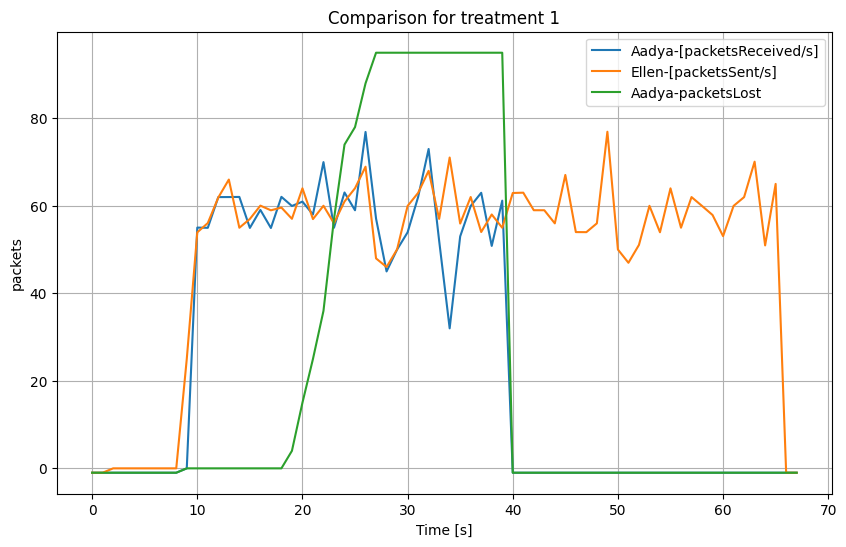

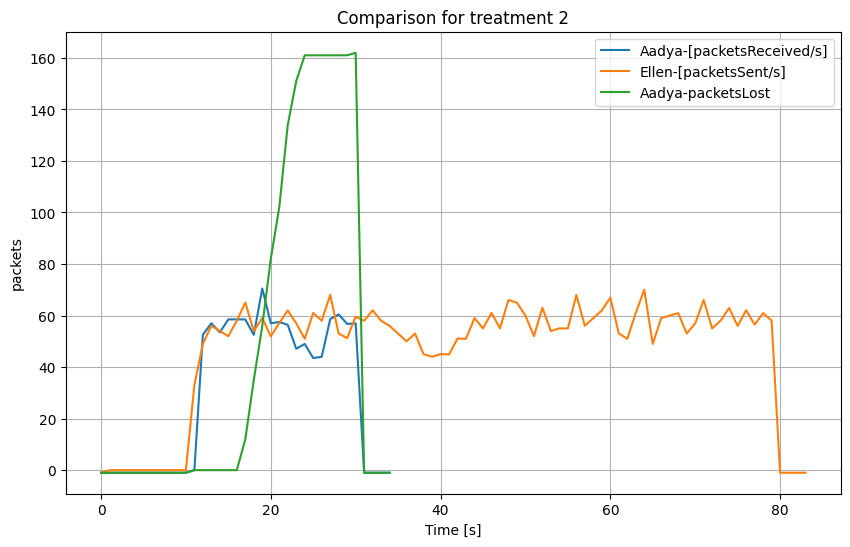

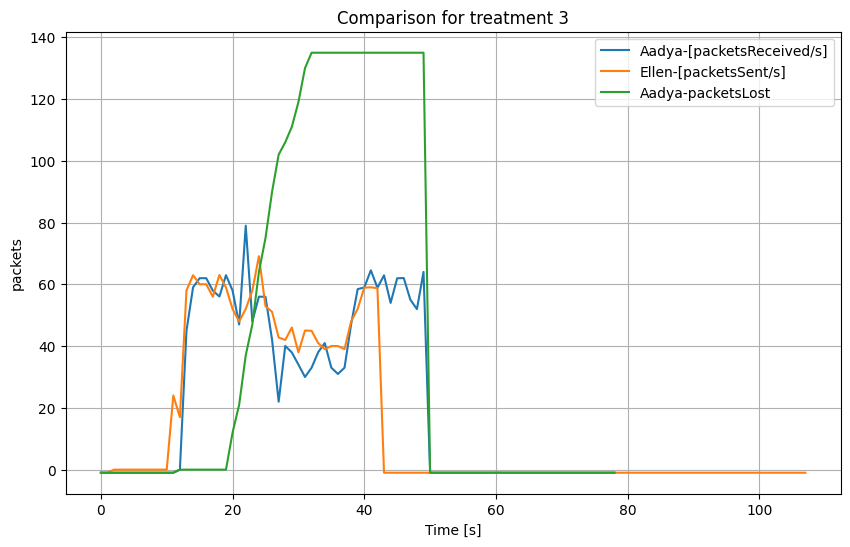

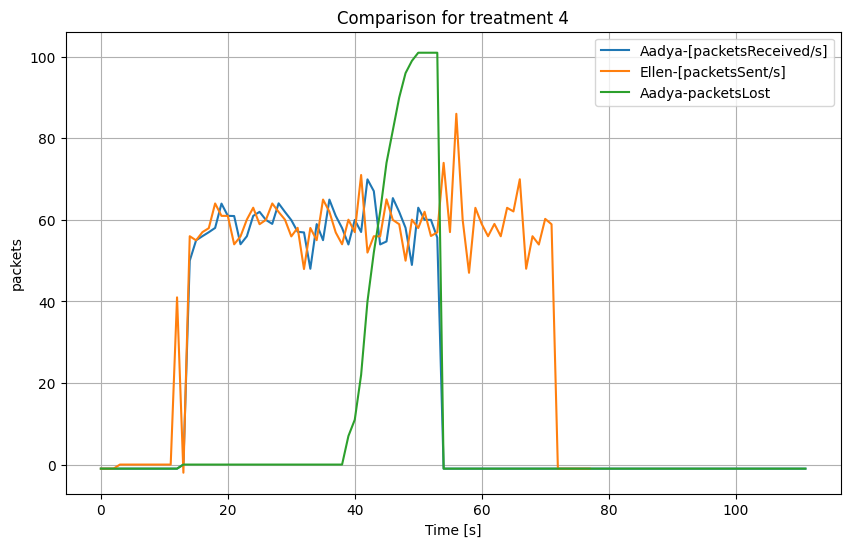

In [ ]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
key3 = 'Aadya-packetsLost'
file_paths = [file_path1, file_path2, file_path3, file_path4]
for filepath in file_paths:
    plot_multiple_arrays(get_values_3_keys(key1, key2, key3, filepath), labels=[key1, key2, key3], title=str("Comparison for treatment " + filepath[107]), xlabel="Time [s]", ylabel="packets")

In [ ]:
def plot_with_two_y_axes(y1, y2, y1_label='Y1 data', y2_label='Y2 data', title='Comparison'):
    x1 = np.arange(0, len(y1))
    x2 = np.arange(0, len(y2))

    fig, ax1 = plt.subplots()

    # Plot on the first y-axis
    ax1.plot(x1, y1, color= 'green', linestyle = '-')
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel(y1_label, color='green')
    ax1.tick_params('y', colors='green')

    # Create a second y-axis and plot on it
    ax2 = ax1.twinx()
    ax2.plot(x2, y2, color = 'purple', linestyle = '-')
    ax2.set_ylabel(y2_label, color='purple')
    ax2.tick_params('y', colors='purple')

    plt.title(title)
    plt.show()


In [41]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
key3 = 'Aadya-packetsLost'
file_paths = [file_path1, file_path2, file_path3, file_path4]
res_array = []
for filepath in file_paths:
     res_array += get_values_diff_keys(key1, key2, filepath)
file_path = '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/treatment1_13Aug.csv'
array1, array2 = get_values_diff_keys(key1, key2, file_path)
diff = array2 - array1
xvals = np.arange(0, len(diff))
plt.plot(xvals, diff, marker='', linestyle= '-')
plt.title(key1+ " subtracted from " + key2)
plt.xlabel("time [s]")
plt.ylabel('Packets Lost')
plt.grid(True)
plt.show()

arrays_forthis = diff, get_values(key3)[1]
plot_multiple_arrays(arrays_forthis, labels=["Manual packets lost", "Aadya-packetsLost"], title=str("Comparison of Manual and measured PL"), xlabel="Time [s]", ylabel="Packets")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/treatment1_13Aug.csv'

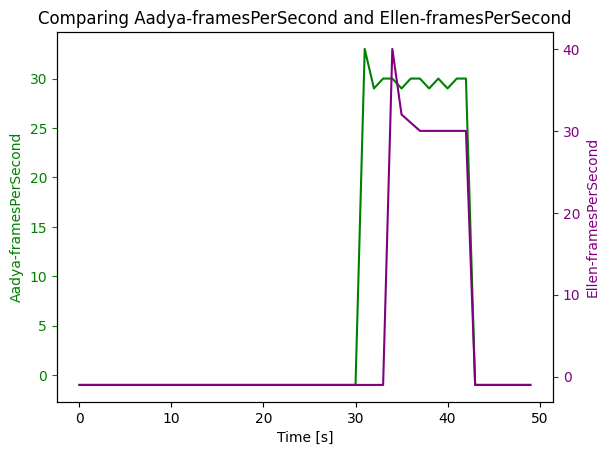

In [ ]:
key1 = 'Aadya-framesPerSecond'
key2 = 'Ellen-framesPerSecond'
y1, y2 = get_values_diff_keys(key1, key2, filepath_1)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2) )

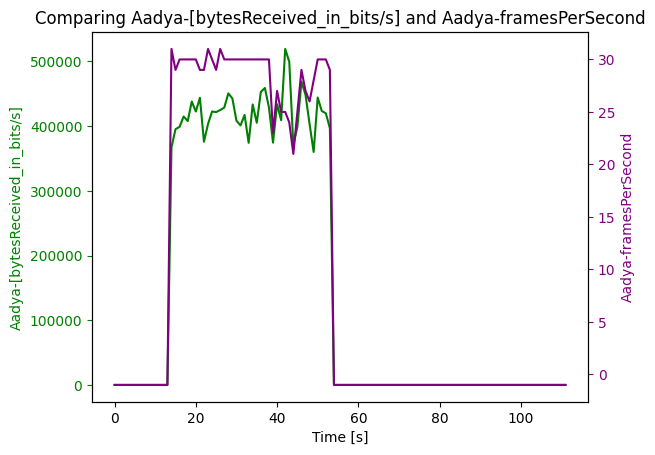

In [ ]:
key1 = 'Aadya-[bytesReceived_in_bits/s]'
key2 = 'Aadya-framesPerSecond'
y1, y2 = get_values_diff_keys(key1, key2, file_path4)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2) )

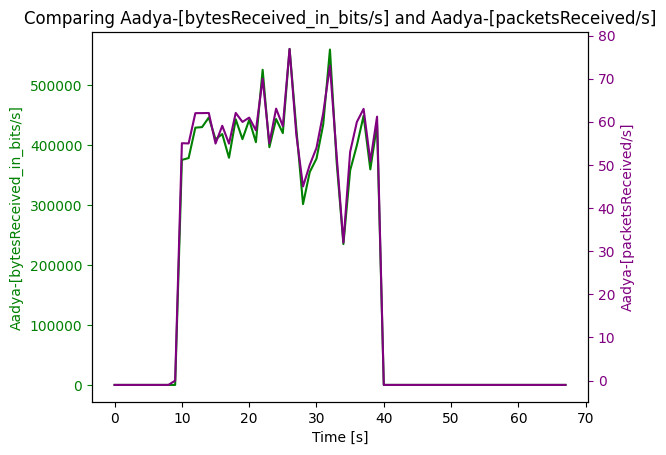

In [ ]:
key1 = 'Aadya-[bytesReceived_in_bits/s]'
key2 = 'Aadya-[packetsReceived/s]'
y1, y2 = get_values_diff_keys(key1, key2, file_path1)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2) )

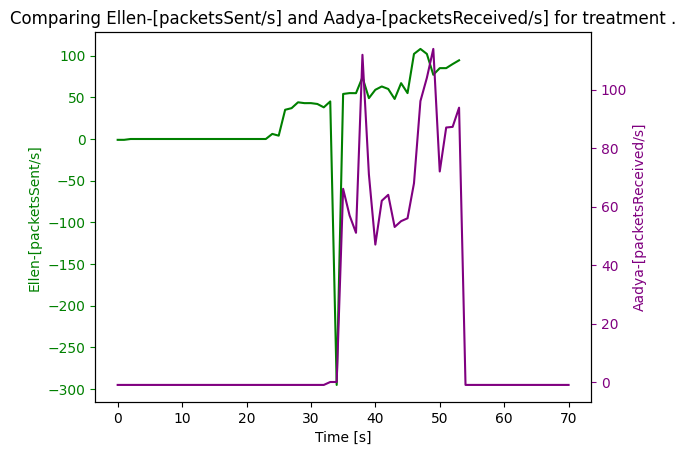

In [ ]:
key1 ='Ellen-[packetsSent/s]'
key2 = 'Aadya-[packetsReceived/s]'
file_path = '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/treatment2.csv'
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 +" and " + key2 + " for treatment " + file_path[87] ) )

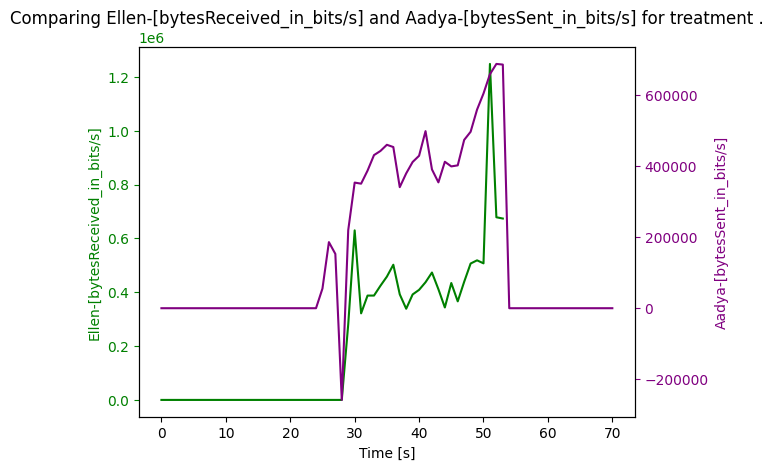

In [ ]:
key1 ='Ellen-[bytesReceived_in_bits/s]'
key2 = 'Aadya-[bytesSent_in_bits/s]'
file_path = '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/treatment2.csv'
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 +" and " + key2 + " for treatment " + file_path[87] ) )

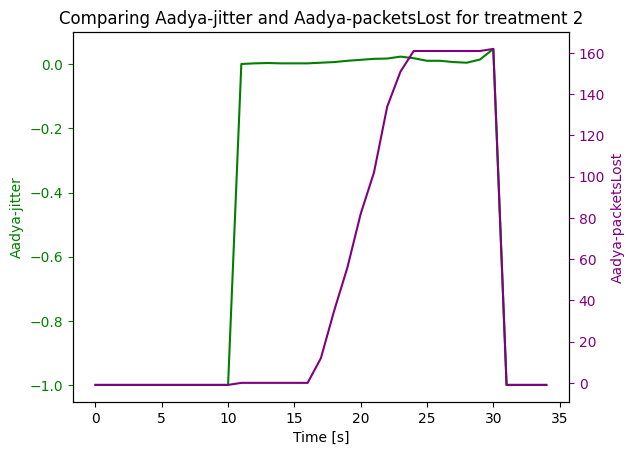

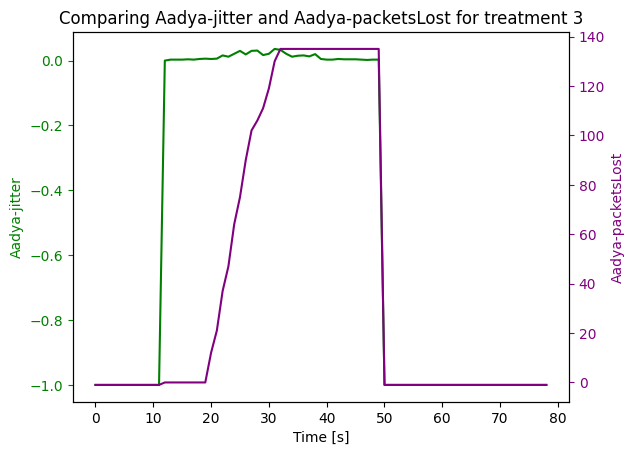

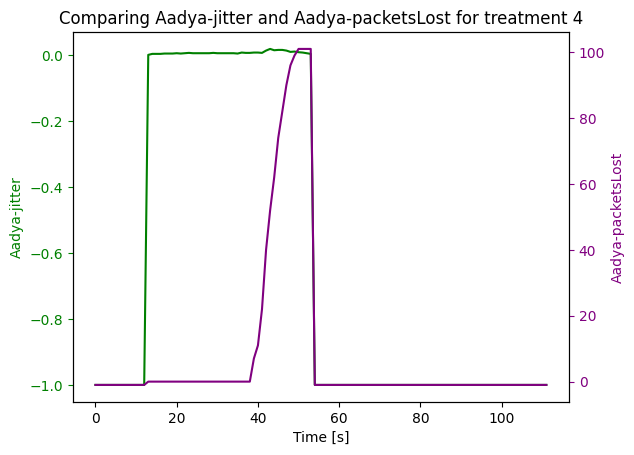

In [ ]:
key1 = 'Aadya-jitter'
key2 = 'Aadya-packetsLost'
file_path = file_path2
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment " + file_path[107] ) )
file_path = file_path3
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment " + file_path[107] ) )
file_path = file_path4
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment " + file_path[107] ) )


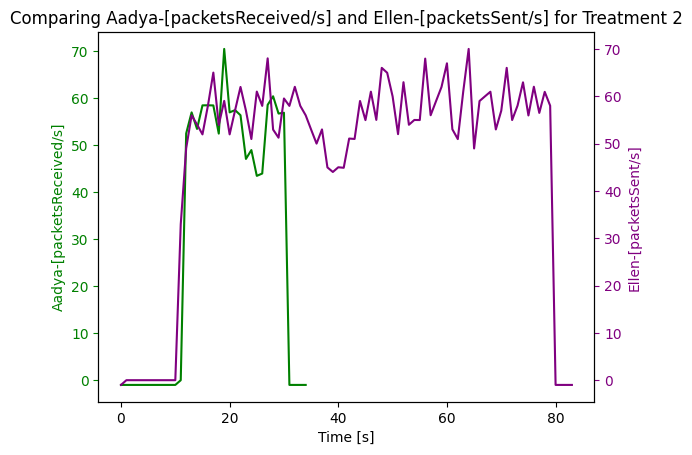

In [ ]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
file_path = file_path2
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )

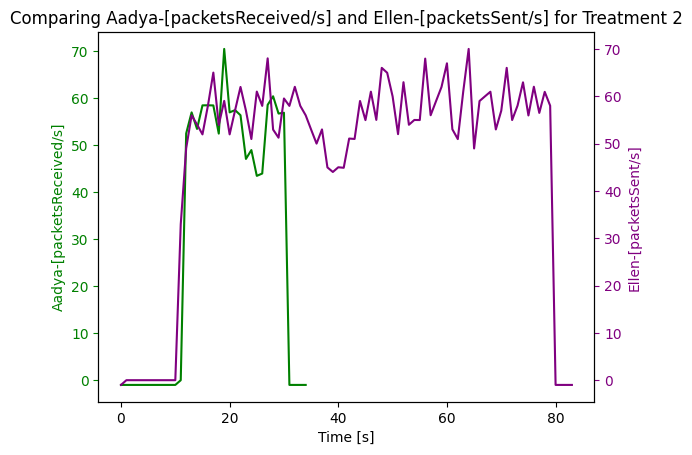

In [ ]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
file_path = file_path2
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )

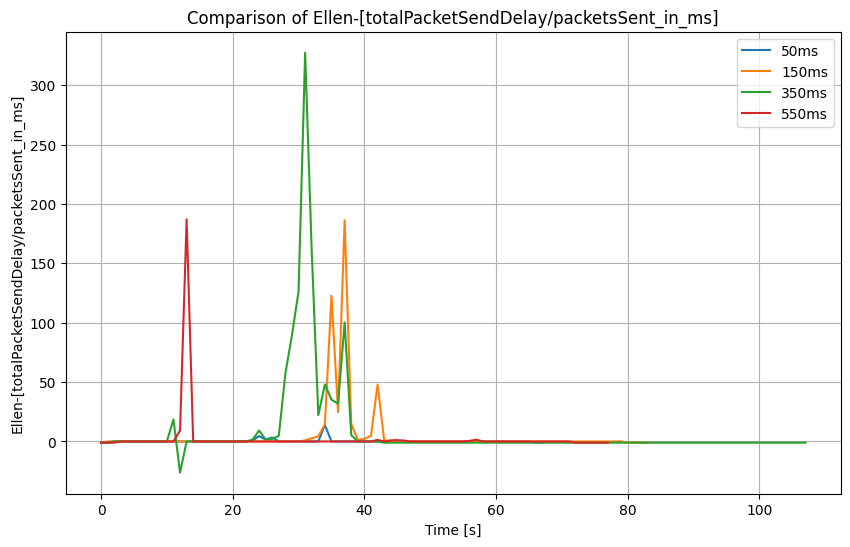

In [ ]:
key = 'Ellen-[totalPacketSendDelay/packetsSent_in_ms]' #stat to compare across latencies
plot_multiple_arrays(get_values_ellen(key), labels=["50ms", "150ms", "350ms", "550ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

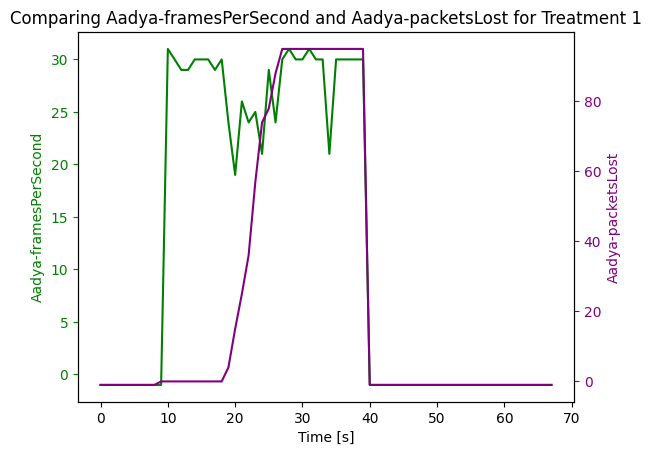

In [ ]:
key1 = 'Aadya-framesPerSecond'
key2 = 'Aadya-packetsLost'
file_path = file_path1
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )


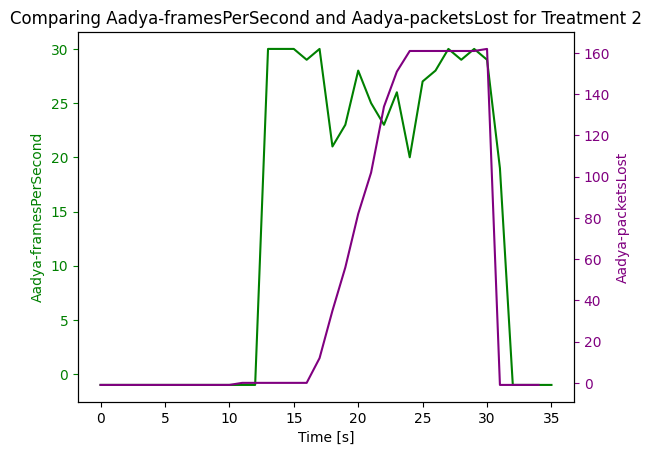

In [ ]:
key1 = 'Aadya-framesPerSecond'
key2 = 'Aadya-packetsLost'
file_path = file_path2
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )


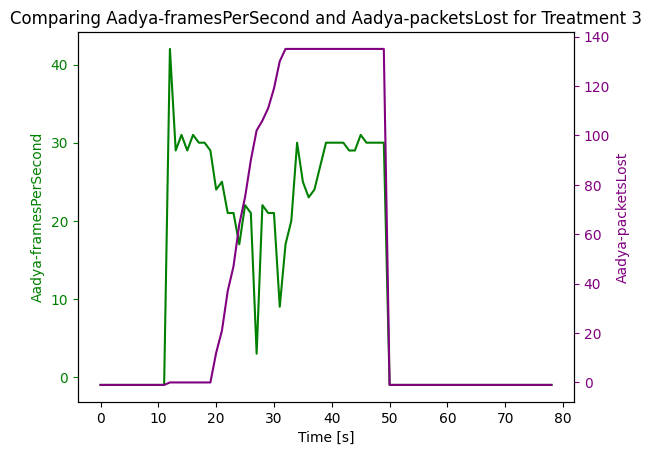

In [ ]:
key1 = 'Aadya-framesPerSecond'
key2 = 'Aadya-packetsLost'
file_path = file_path3
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )

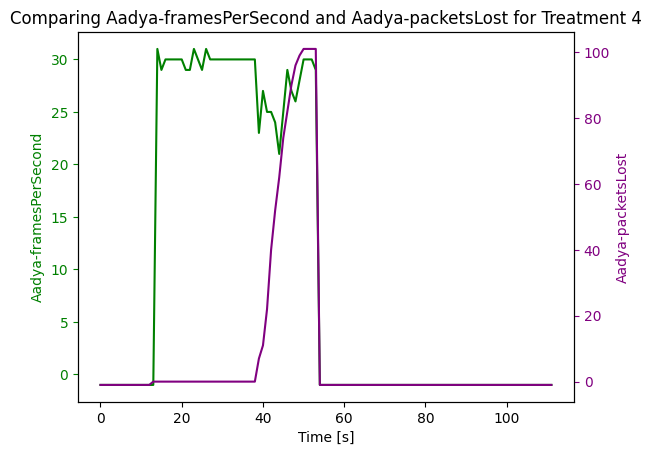

In [ ]:
key1 = 'Aadya-framesPerSecond'
key2 = 'Aadya-packetsLost'
file_path = file_path4
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[107] ) )

In [ ]:
def plpersec(file):
    packet_loss_vals = extract_row(file, 'Aadya-packetsLost')
    packets_lost_per_second = np.diff(packet_loss_vals)
    return packets_lost_per_second

In [ ]:
untimed_file1 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment1_13Aug.csv"
untimed_file2 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment2_13Aug.csv"
untimed_file3 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment3_13Aug.csv"
untimed_file4 = "/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment4_13Aug.csv"

pltimed = plpersec(untimed_file1)
xvals = np.arange(0, len(pltimed))
plt.plot(xvals, pltimed, marker='', linestyle= '-')
plt.title("packets lost per second for treatment")
plt.xlabel("time [s]")
plt.ylabel('Packets Lost per second')
plt.grid(True)
plt.show()

The following code is for values that are cumulative, and we can graph the ratio of the stat to the call length against the latencies

In [ ]:
def get_last_value(key):
    values1 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment1_13Aug.csv", key)
    values2 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment2_13Aug.csv", key)
    values3 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment3_13Aug.csv", key)
    values4 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment4_13Aug.csv", key)
    values5 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment5_13Aug_aadya_only.csv", key)
    return np.array([values1[-1],values2[-1], values3[-1],values4[-1], values5[-1]]), np.array( [len(values1), len(values2), len(values3), len(values4),  len(values5)])

In [ ]:
def get_last_value_new(key):
    values1 = extract_row("filepath_1", key)
    values2 = extract_row("filepath_2", key)
    values3 = extract_row("filepath_3", key)
    return np.array([values1[-1],values2[-1], values3[-1]]), np.array( [len(values1), len(values2), len(values3)])

In [ ]:
latencies = (100, 50, 200)

In [ ]:
keycumulative = 'Aadya-totalPacketSendDelay' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([100, 50, 200], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

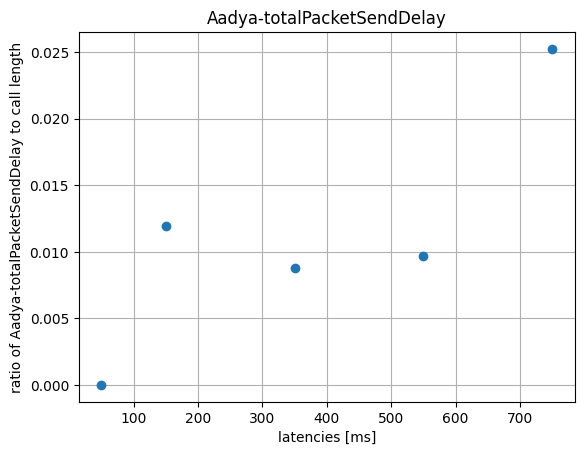

In [ ]:
keycumulative = 'Aadya-totalPacketSendDelay' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

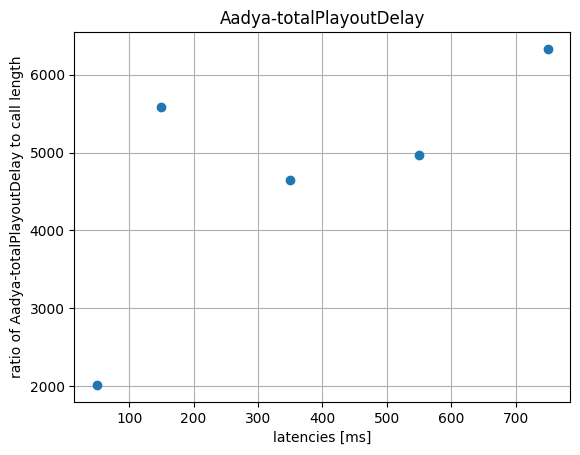

In [ ]:
keycumulative = 'Aadya-totalPlayoutDelay' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

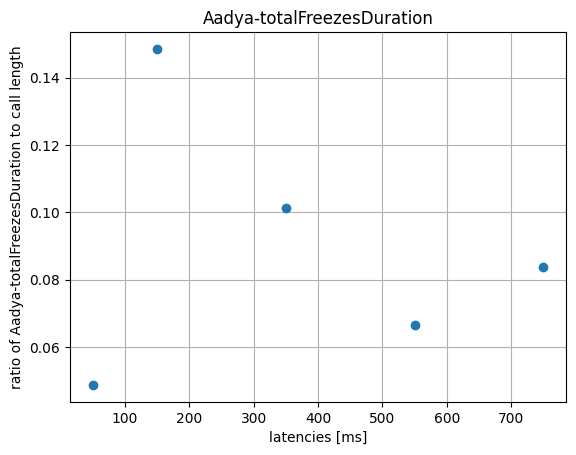

In [ ]:
keycumulative = 'Aadya-totalFreezesDuration' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

In [ ]:
file_path6= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment6_13Aug_aadya_only.csv'
file_path7= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment7_13Aug.csv'
file_path8= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment8_13Aug.csv'
file_path9= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment9_13Aug.csv'
file_path10= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment10_13Aug.csv'
file_path12= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment12_13Aug_aadya_only.csv'
file_path13= '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment13_13Aug.csv'

def get_last_value_all(key):
    values1 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment1_13Aug.csv", key)
    values2 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment2_13Aug.csv", key)
    values3 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment3_13Aug.csv", key)
    values4 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment4_13Aug.csv", key)
    values5 = extract_row("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSV_files_test_13Aug/raw untimed csv files/treatment5_13Aug_aadya_only.csv", key)
    values6 = extract_row(file_path6, key)
    values7 = extract_row(file_path7, key)
    values8 = extract_row(file_path8, key)
    values9 = extract_row(file_path9, key)
    values10 = extract_row(file_path10, key)
    values12 = extract_row(file_path12, key)
    values13 = extract_row(file_path13, key)
    return np.array([values1[-1],values2[-1], values3[-1], values4[-1], values5[-1], values6[-1], values7[-1], values8[-1], values9[-1], values10[-1], values12[-1], values13[-1]]), np.array([len(values1), len(values2), len(values3), len(values4), len(values5), len(values6), len(values7), len(values8), len(values9), len(values10), len(values12), len(values13)])

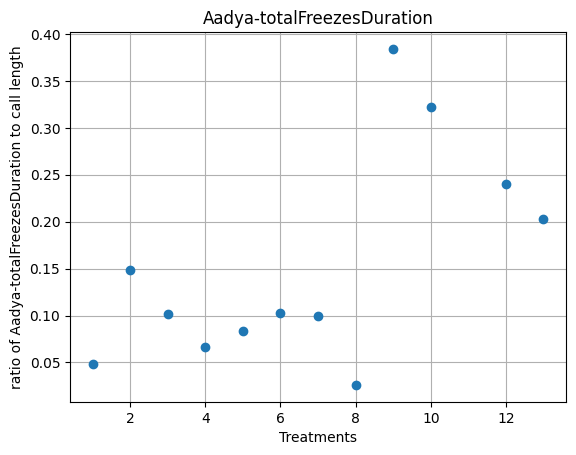

In [ ]:

def plot_all(key_cumulative):
    array1, array2 = get_last_value_all(key_cumulative)
    statratio = array1 / array2
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13 ], statratio, marker='o', linestyle = '')
    plt.title(key_cumulative)
    plt.xlabel("Treatments")
    plt.ylabel("ratio of " + key_cumulative + " to call length")
    plt.grid(True)
    plt.show()

key_cumulative = 'Aadya-totalFreezesDuration' #replace with cumulative stat
plot_all(key_cumulative)

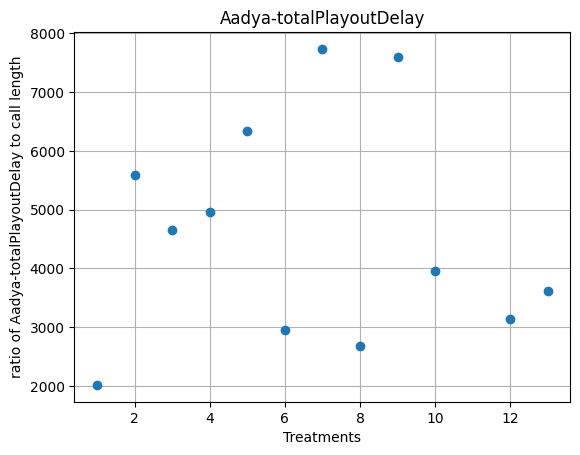

In [ ]:
key_cumulative = 'Aadya-totalPlayoutDelay' #replace with cumulative stat
plot_all(key_cumulative)

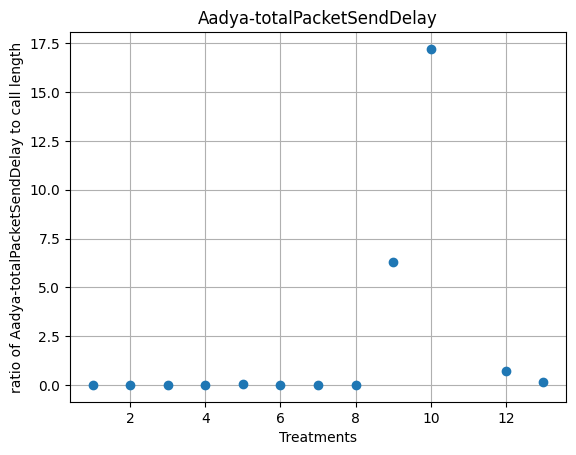

In [ ]:
key_cumulative = 'Aadya-totalPacketSendDelay' #replace with cumulative stat
plot_all(key_cumulative)

# 30th August attempts

In [44]:
file_paths_30_Aug = ['/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment1.csv', 
                     '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment2.csv', 
                     '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment3.csv',
                     '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment4.csv',
                     '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment5.csv',
                     '/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/CSVs/30_Aug/treatment6.csv']

## Comparing packets recieved and sent

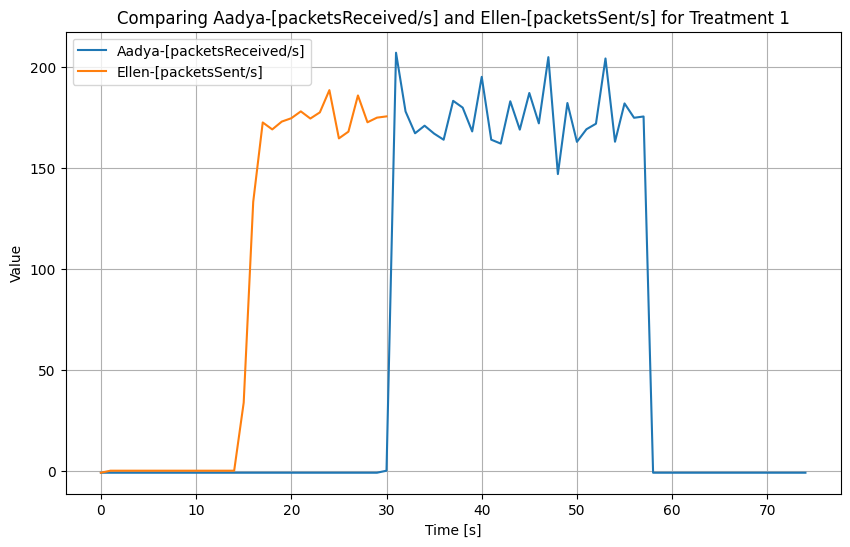

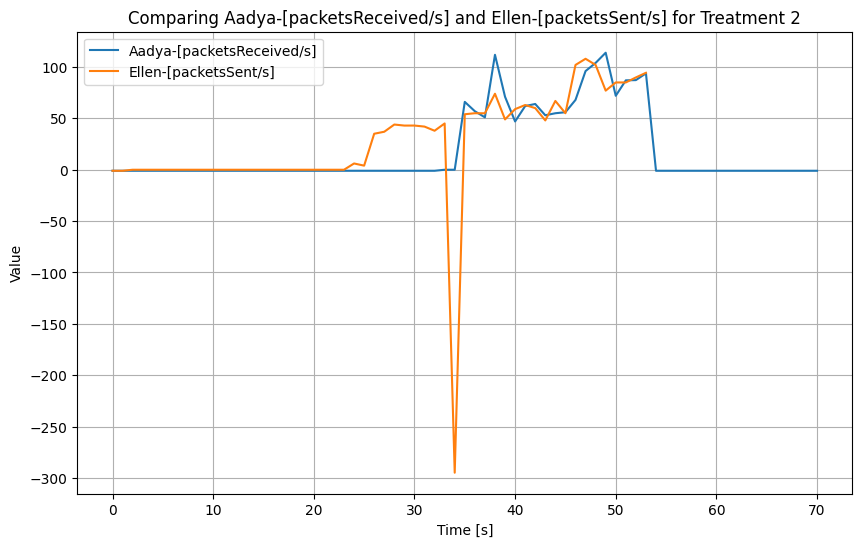

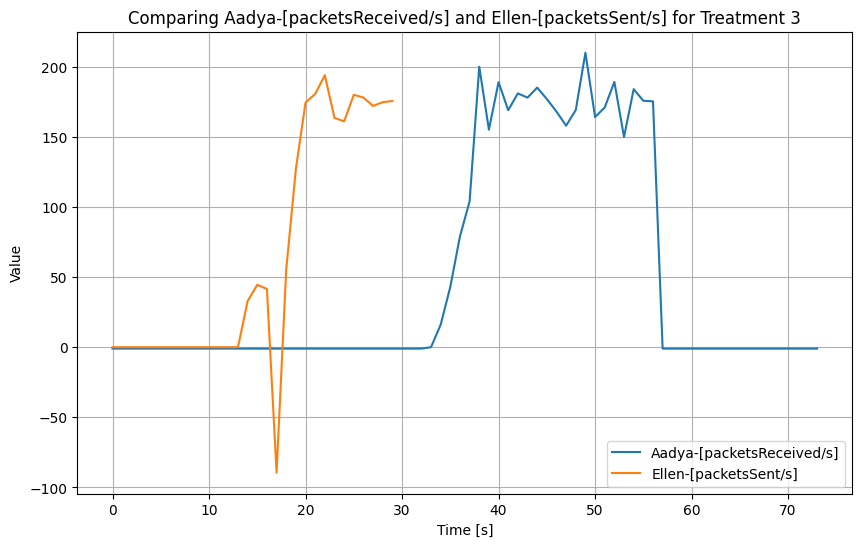

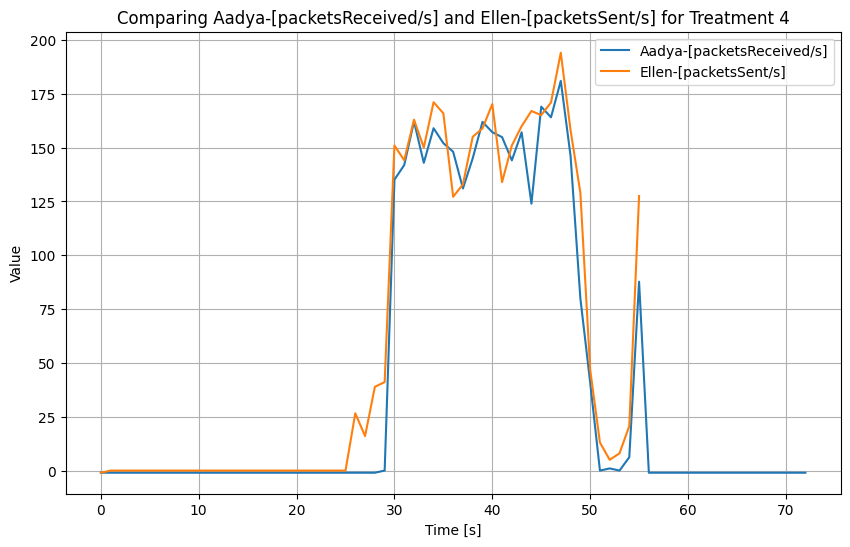

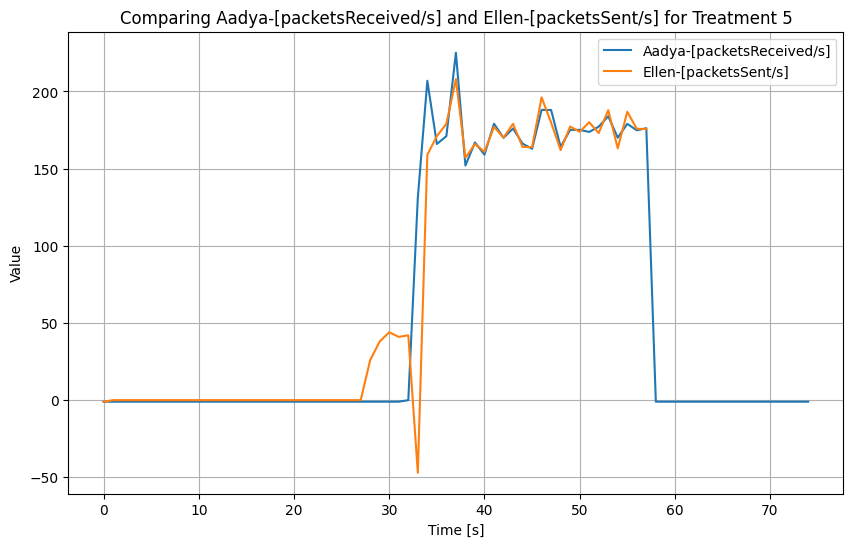

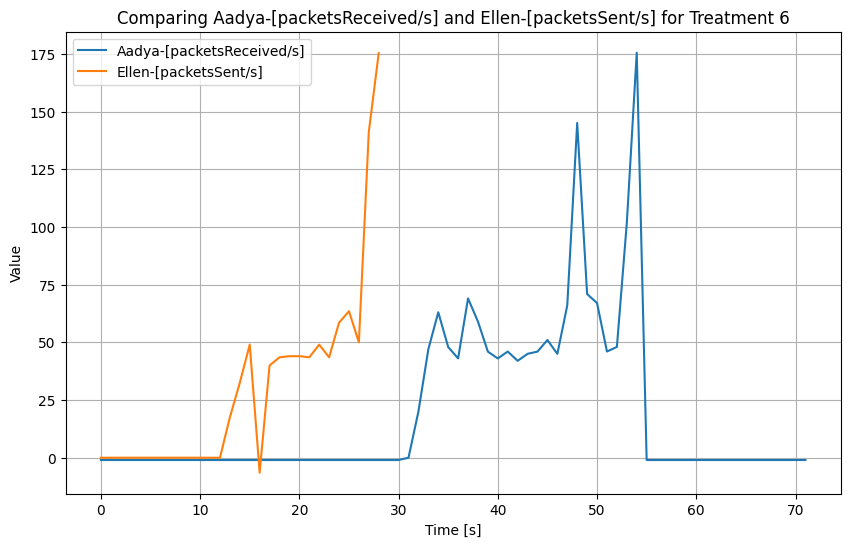

In [95]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'

for file in file_paths_30_Aug:
    plot_multiple_arrays(get_values_diff_keys(key1, key2, file),title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file[98]), labels=[key1, key2])


### the other way

In [ ]:
key1 = 'Ellen-[packetsReceived/s]'
key2 = 'Aadya-[packetsSent/s]'

for file in file_paths_30_Aug:
    plot_multiple_arrays(get_values_diff_keys(key1, key2, file),title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file[98]), labels=[key1, key2])


### Comparing bytes sent and recieved 

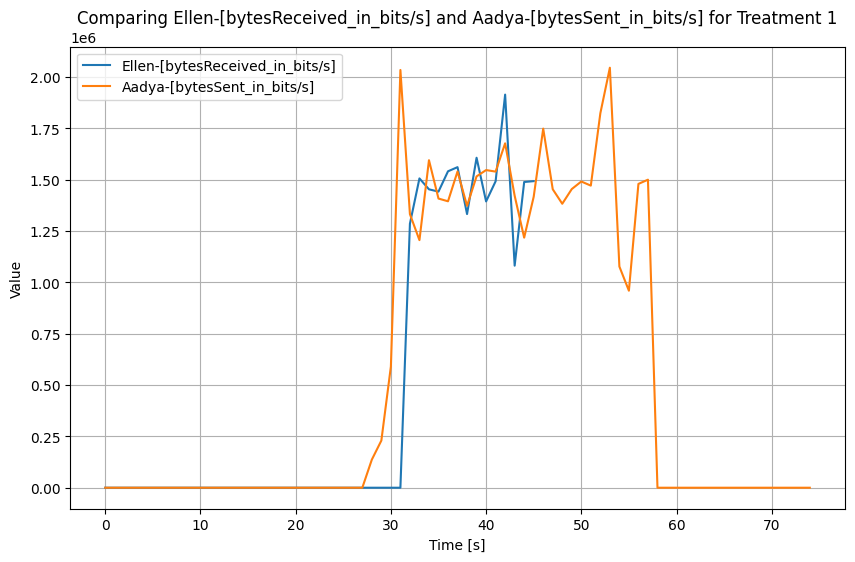

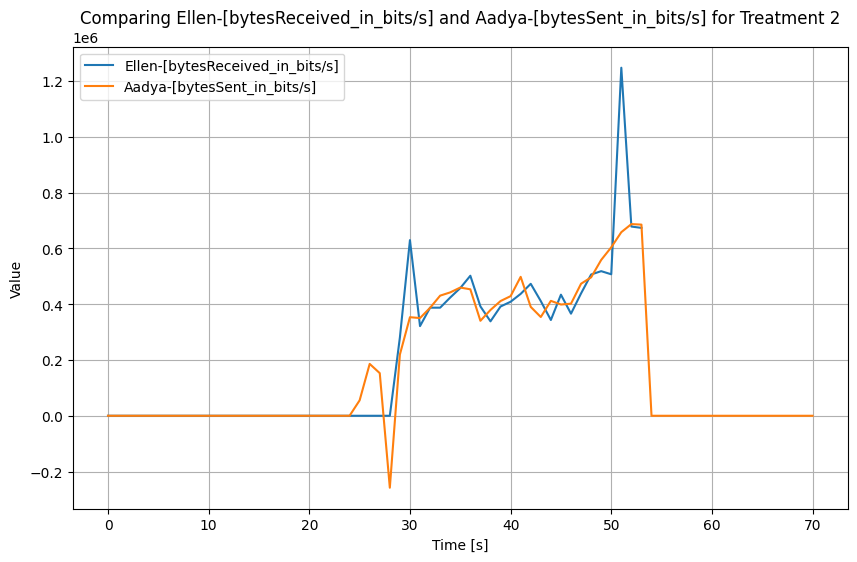

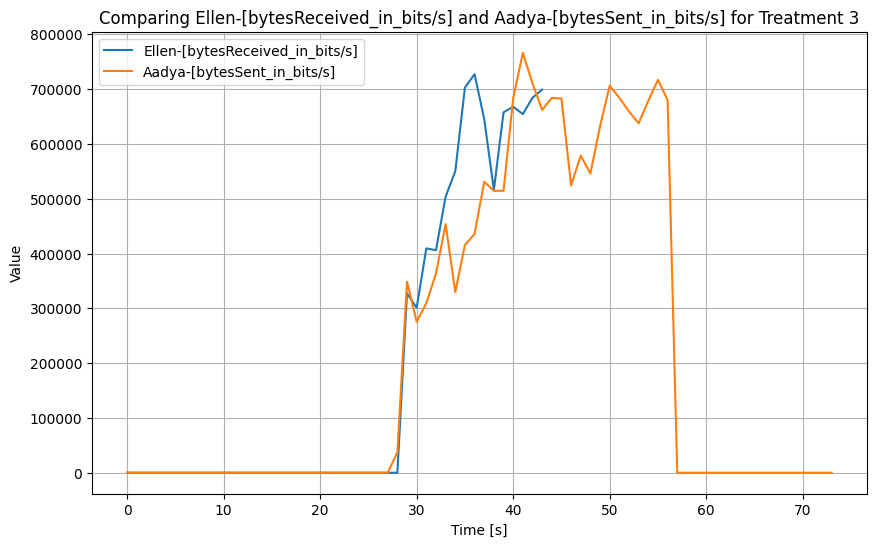

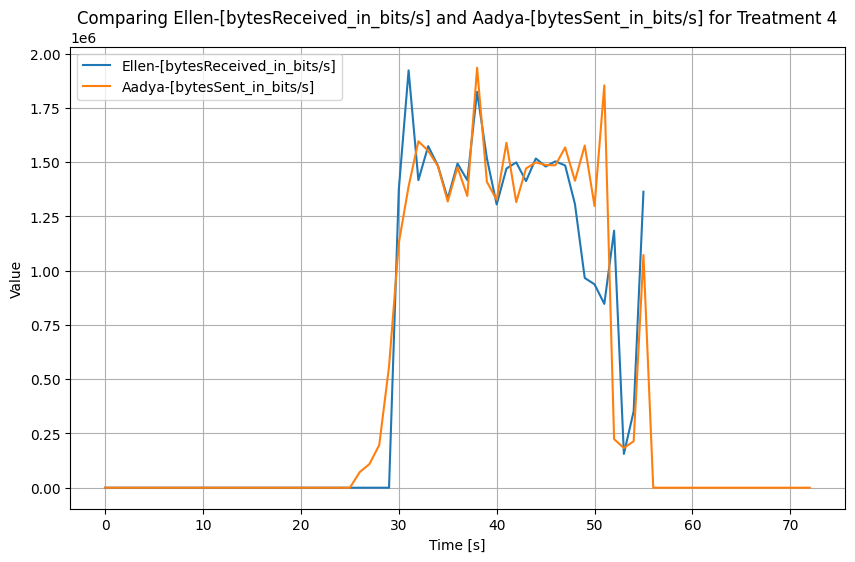

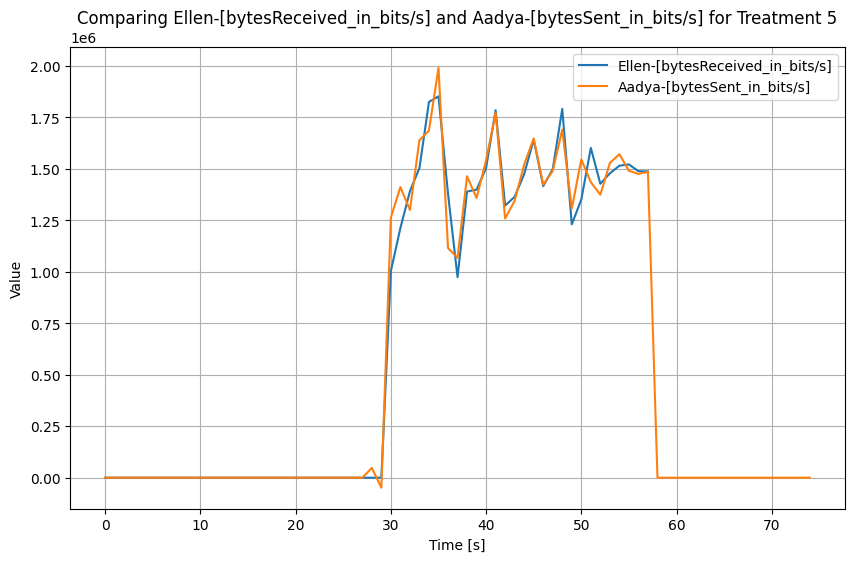

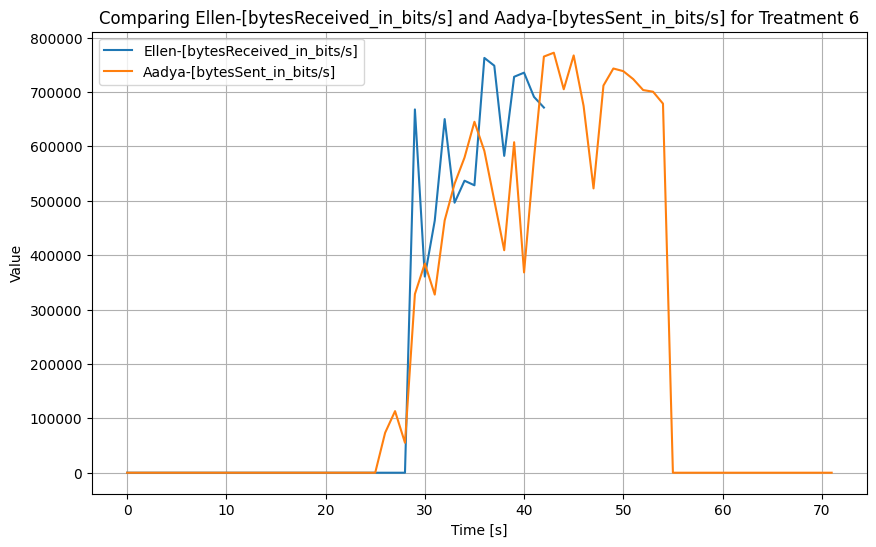

In [94]:
key1 = 'Ellen-[bytesReceived_in_bits/s]'
key2 = 'Aadya-[bytesSent_in_bits/s]'

for file in file_paths_30_Aug:
    plot_multiple_arrays(get_values_diff_keys(key1, key2, file),title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file[98]), labels=[key1, key2])


In [ ]:
key1 = 'Aadya-[bytesReceived_in_bits/s]'
key2 = 'Ellen-[bytesSent_in_bits/s]'

for file in file_paths_30_Aug:
    plot_multiple_arrays(get_values_diff_keys(key1, key2, file),title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file[98]), labels=[key1, key2])

In [67]:
def last_value_30_aug(key): 
    values1 = extract_row(file_paths_30_Aug[0], key)
    values2 = extract_row(file_paths_30_Aug[1], key)
    values3 = extract_row(file_paths_30_Aug[2], key)
    values4 = extract_row(file_paths_30_Aug[3], key)
    values5 = extract_row(file_paths_30_Aug[4], key)
    values6 = extract_row(file_paths_30_Aug[5], key)
    return np.array([values1[-1],values2[-1], values3[-1], values4[-1], values5[-1], values6[-1]]), np.array([len(values1), len(values2), len(values3), len(values4), len(values5), len(values6)])

In [69]:
import numpy as np

def last_non_negative(values):
    # Find the last value that is not -1; if none, return None
    for value in reversed(values):
        if value != -1:
            return value
    return None  # Return None if all values are -1

def last_value_30_aug(key):
    values1 = extract_row(file_paths_30_Aug[0], key)
    values2 = extract_row(file_paths_30_Aug[1], key)
    values3 = extract_row(file_paths_30_Aug[2], key)
    values4 = extract_row(file_paths_30_Aug[3], key)
    values5 = extract_row(file_paths_30_Aug[4], key)
    values6 = extract_row(file_paths_30_Aug[5], key)
    
    # Apply the helper function to each set of values
    last_values = [
        last_non_negative(values1),
        last_non_negative(values2),
        last_non_negative(values3),
        last_non_negative(values4),
        last_non_negative(values5),
        last_non_negative(values6)
    ]
    
    # Get lengths of each value list
    lengths = [len(values1), len(values2), len(values3), len(values4), len(values5), len(values6)]
    
    return np.array(last_values), np.array(lengths)


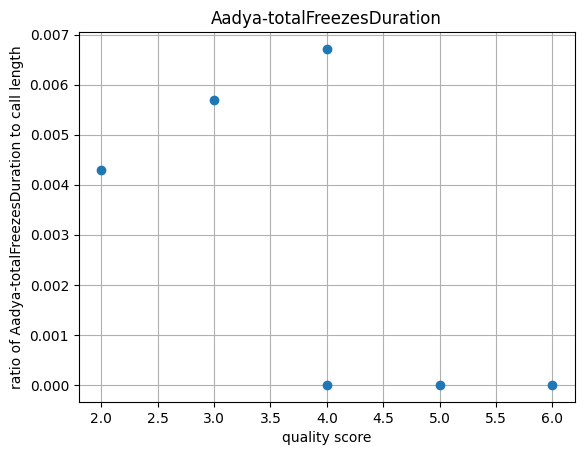

In [113]:
def plot_all_30_aug(key_cumulative):
    array1, array2 = last_value_30_aug(key_cumulative)
    statratio = array1 / array2
    plt.plot([6, 2, 4, 4, 5, 3] , statratio, marker='o', linestyle = '')
    plt.title(key_cumulative)
    plt.xlabel("quality score")
    plt.ylabel("ratio of " + key_cumulative + " to call length")
    plt.grid(True)
    plt.show()

key_cumulative = 'Aadya-totalFreezesDuration' #replace with cumulative stat
plot_all_30_aug(key_cumulative)

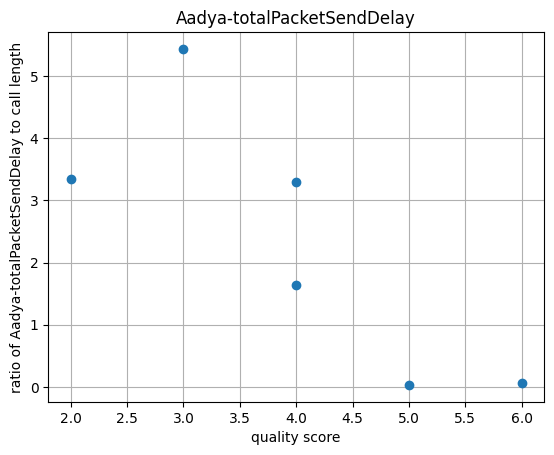

In [114]:
key_cumulative = 'Aadya-totalPacketSendDelay' #replace with cumulative stat
plot_all_30_aug(key_cumulative)

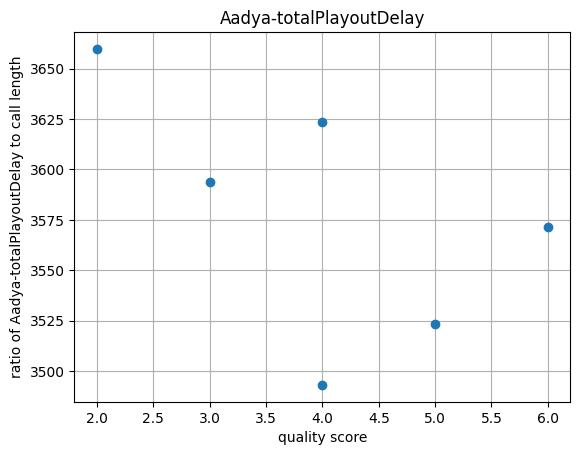

In [115]:
key_cumulative = 'Aadya-totalPlayoutDelay' #replace with cumulative stat
plot_all_30_aug(key_cumulative)

In [102]:
def plot_multiple_arrays_x(y1, y2, start=1, step=1, even_step=2, labels=[key1, key2], xlabel="Time [s]", ylabel="Y"):
    title=str("Stretching ellen treatment " + file_path[98])
    # Generate x-values for each y-array
    x1 = np.arange(start, start + len(y1) * step, step)
    x2 = np.arange(start + step, start + len(y2) * even_step + step, even_step)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the first array
    plt.plot(x1, y1, marker=' ', label=labels[0] if labels and len(labels) > 0 else "Series 1")
    
    # Plot the second array
    plt.plot(x2, y2, marker=' ', label=labels[1] if labels and len(labels) > 1 else "Series 2")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


In [123]:
def plot_multiple_arrays_x(y1, y2, n, start=1, even_step=2, labels=["key1", "key2"], xlabel="Time [s]", ylabel="Y"):
    title = "Stretching ellen treatment " + file_path[98]  # Adjust file_path as needed

    # Calculate the x-values for y1 with 1 second intervals
    x1 = np.arange(start, start + len(y1))
    
    # Calculate the x-values for y2 with 1 second intervals up to n, then 2 seconds intervals
    x2_1s = np.arange(start, min(n, start + len(y2)), 1)
    x2_2s = np.arange(min(n, start + len(y2)), start + len(y2), 2)
    x2 = np.concatenate([x2_1s, x2_2s])
    
    plt.figure(figsize=(10, 6))
    
    # Plot the first array
    plt.plot(x1, y1, marker=' ', label=labels[0] if labels and len(labels) > 0 else "Series 1")
    
    # Plot the second array
    plt.plot(x2, y2[:len(x2)], marker=' ', label=labels[1] if labels and len(labels) > 1 else "Series 2")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


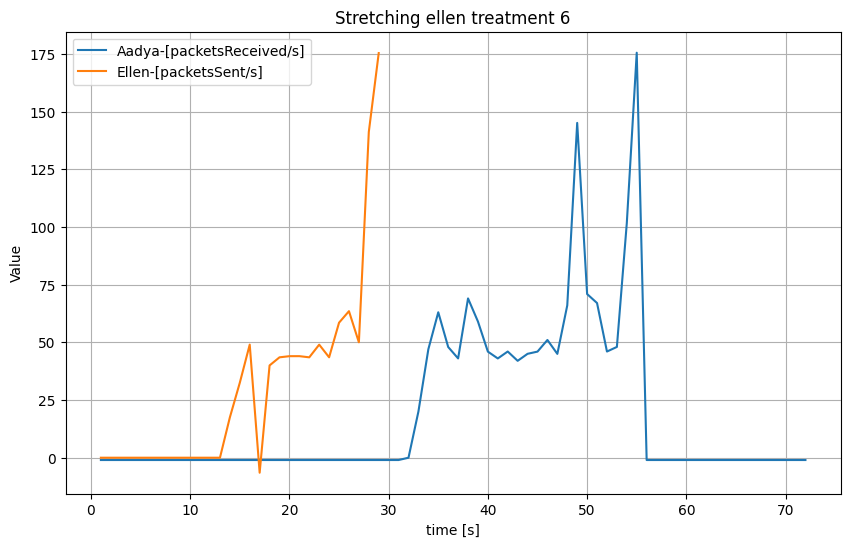

In [125]:
file_path = file_paths_30_Aug[5]
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
y1, y2= extract_row((file_path), key1), extract_row((file_path), key2)

plot_multiple_arrays_x(y1, y2, n = 70, start= 1, even_step=2, labels=[key1, key2], xlabel="time [s]", ylabel="Value" )

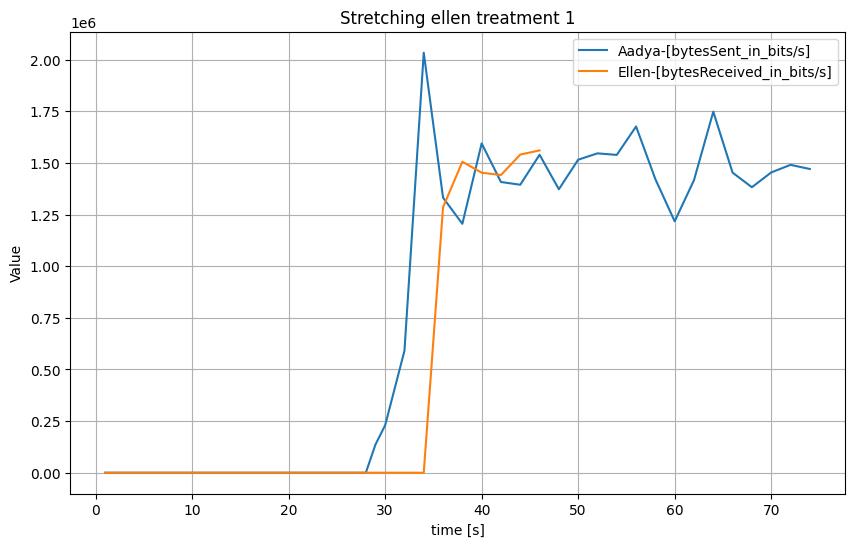

In [119]:
file_path = file_paths_30_Aug[0]
key2 = 'Ellen-[bytesReceived_in_bits/s]'
key1 = 'Aadya-[bytesSent_in_bits/s]'
y1, y2= extract_row((file_path), key1), extract_row((file_path), key2)

plot_multiple_arrays_x(y1, y2, n= 30, start=1, even_step=2, labels=[key1, key2], xlabel="time [s]", ylabel="Value" )

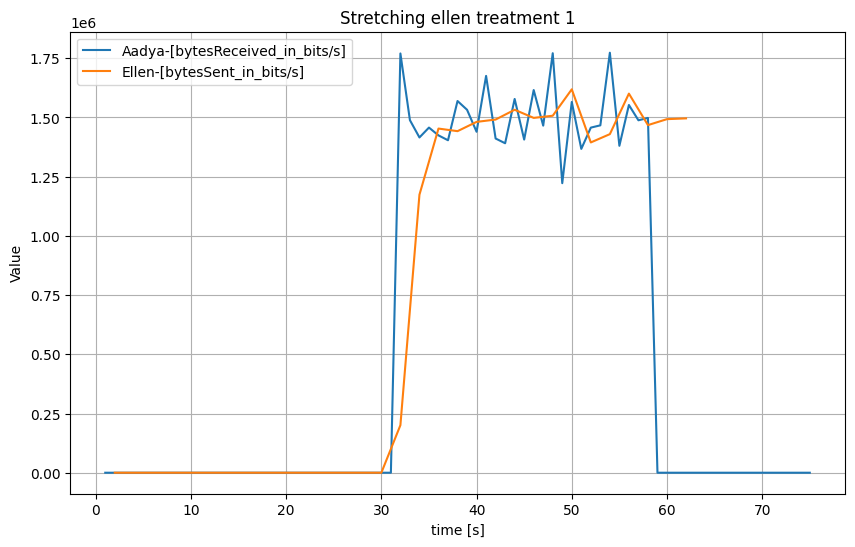

In [105]:
file_path = file_paths_30_Aug[0]
key2 = 'Ellen-[bytesSent_in_bits/s]'
key1 = 'Aadya-[bytesReceived_in_bits/s]'
y1, y2= extract_row((file_path), key1), extract_row((file_path), key2)

plot_multiple_arrays_x(y1, y2, start=1, step=1, even_step=2, labels=[key1, key2], xlabel="time [s]", ylabel="Value" )

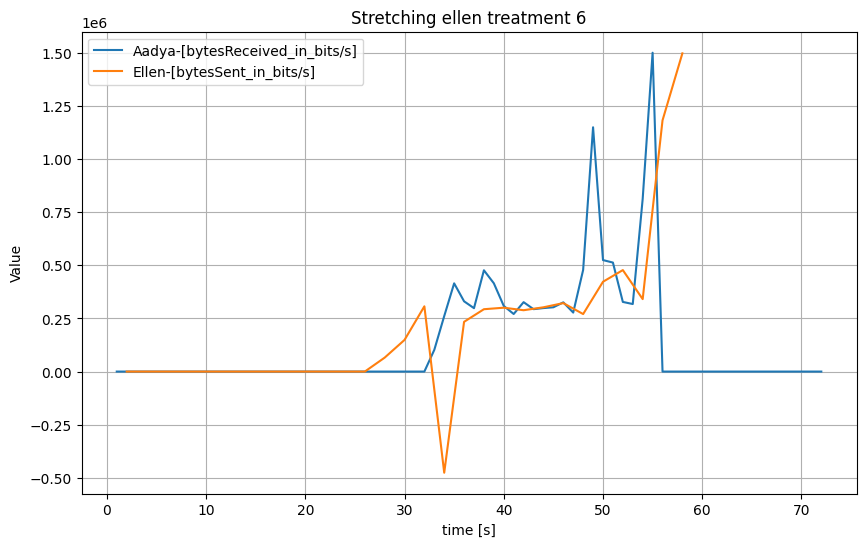

In [107]:
file_path = file_paths_30_Aug[5]
key2 = 'Ellen-[bytesSent_in_bits/s]'
key1 = 'Aadya-[bytesReceived_in_bits/s]'
y1, y2= extract_row((file_path), key1), extract_row((file_path), key2)

plot_multiple_arrays_x(y1, y2, start=1, step=1, even_step=2, labels=[key1, key2], xlabel="time [s]", ylabel="Value" )

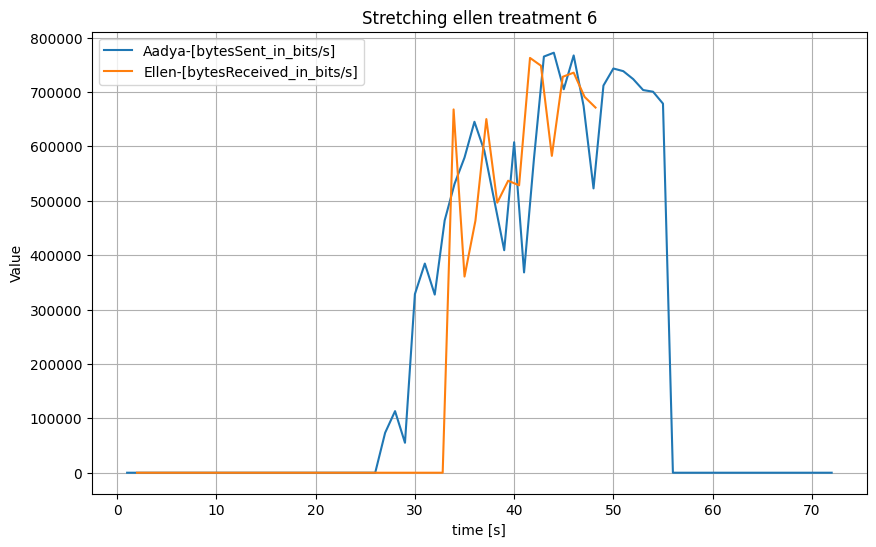

In [110]:
file_path = file_paths_30_Aug[5]
key2 = 'Ellen-[bytesReceived_in_bits/s]'
key1 = 'Aadya-[bytesSent_in_bits/s]'
y1, y2= extract_row((file_path), key1), extract_row((file_path), key2)

plot_multiple_arrays_x(y1, y2, start=1, step=1, even_step=1.1, labels=[key1, key2], xlabel="time [s]", ylabel="Value" )